**This notebook explores the coupons dataset and provides insides through daya visualization techniques.
**More Information about dataset and its features is available in README file in the respository - README.md
**Datset can be found in csv format in the repository

### Method to answer "Will the Customer Accept the Coupon?"

- Step 1: Read & Describe the data to inspect and see if any missing information in the datset.
- Step 2: Format and cleanse the data by handling missing values and converting Categorical to numerical data etc..
- Step 3: Observe the data corrleation using heat map to undertsand the tight correlation between features.
- Step 4: Visualize the data using Seaborn and Matplotlib to reveal information
- Step 5: Answer the question based on the visualizations and correlation drawn from above.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
coupon = pd.read_csv('data/coupons.csv')

### Step 1: Know your dataset

In [ ]:
coupon.head()

In [ ]:
coupon.info()

In [ ]:
coupon.isnull().sum()

In [ ]:
coupon.nunique()

From the above outputs, Most of the columns ate categorical & Boolean. Though the data is numeric, but they have very few unique values, which in my opinion can be treated as categorical

### Step 2: Clean the data

- The column 'car' does not carry any value in this context and it has many missing values too. So, we can drop this column from dataset.
- There are very few rows which have Null values and they seem to be all categorical columns. So, we can drop those rows as well

In [ ]:
coupon.drop('car', axis=1, inplace=True)
coupon.dropna(inplace=True)
coupon.head()

### Step 3: Understand your data
- As most of the features are categorical, we can Crosstab features against target feature 'Y' (Yes/No)

In [ ]:
for col in coupon.drop('Y', axis=1).columns.tolist():
    crosstab = pd.crosstab(coupon[col], coupon['Y'])
    print(f'Crosstab for {col} and Y')
    print(crosstab)    

The above data tells the categories with more coupons sent to drivers and categories where acceptance is high
- Destination 'No Urgent Place' found inetersting
- Age groups 31 and below is noticeable
- Sunny weather has most coupons shared with drivers
- Drivers who are Alone and Friend(s) seems to have received more coupons

### Step 4: Visualize the data to give more meaning
- Percentage of coupons across different categories using pie charts
- As most of the columns are categorical, Barplots or countplots seems more appropriate.

<Axes: title={'center': 'Coupon Expiry'}, ylabel='expiration'>

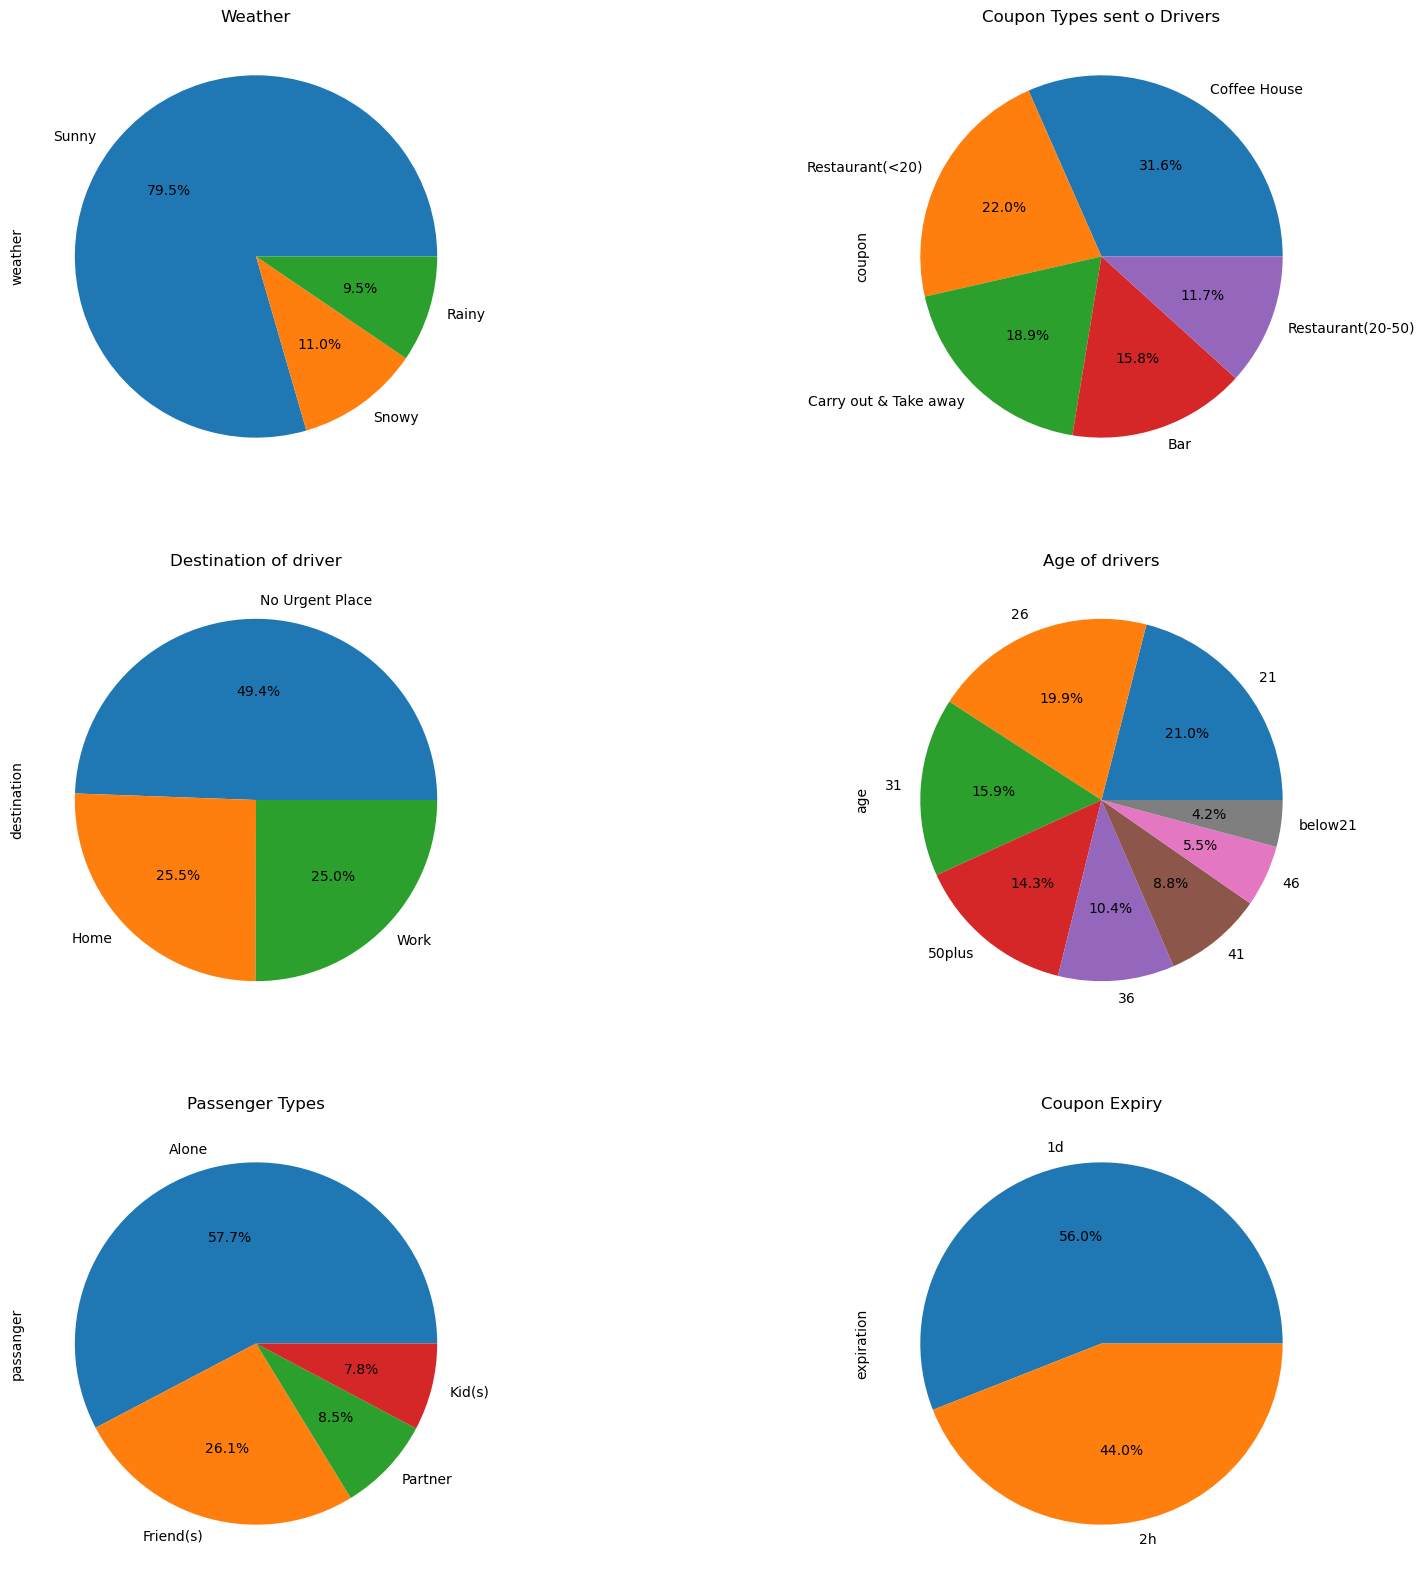

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
plt.title('Weather')
coupon['weather'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,2)
plt.title('Coupon Types sent o Drivers')
coupon['coupon'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,3)
plt.title('Destination of driver')
coupon['destination'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,4)
plt.title('Age of drivers')
coupon['age'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,5)
plt.title('Passenger Types')
coupon['passanger'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
plt.title('Coupon Expiry')
coupon['expiration'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='weather,age'>

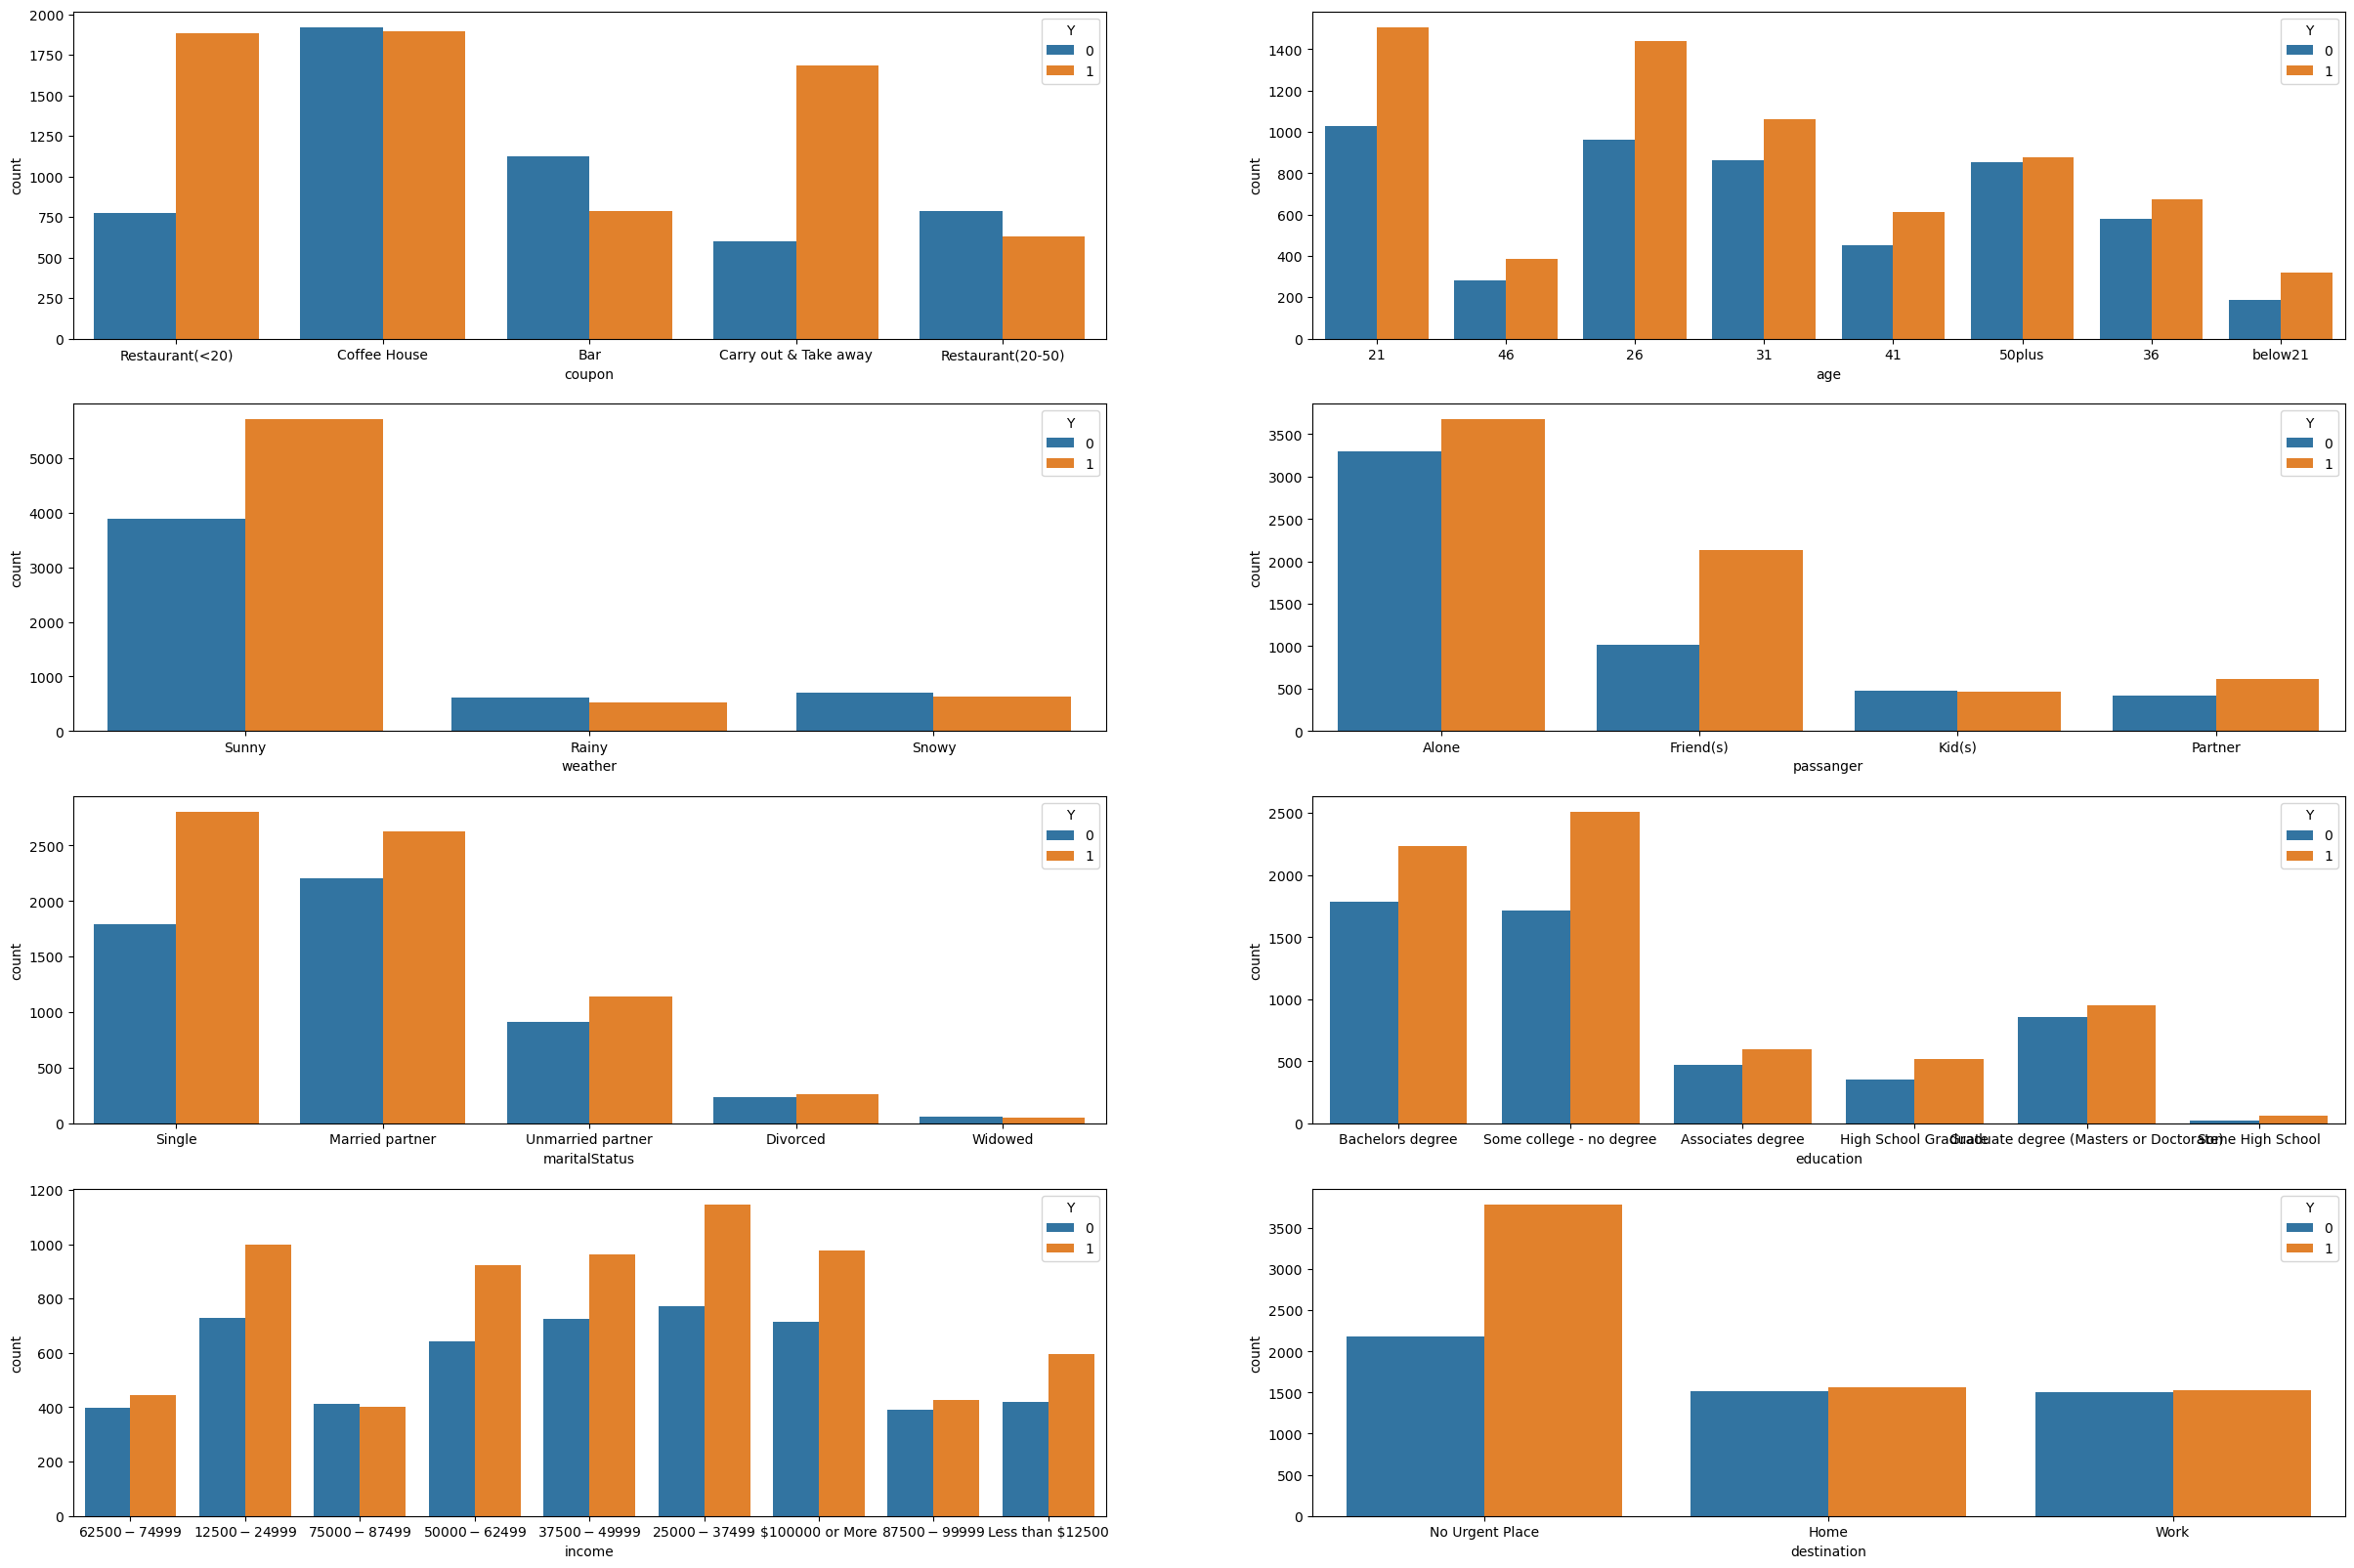

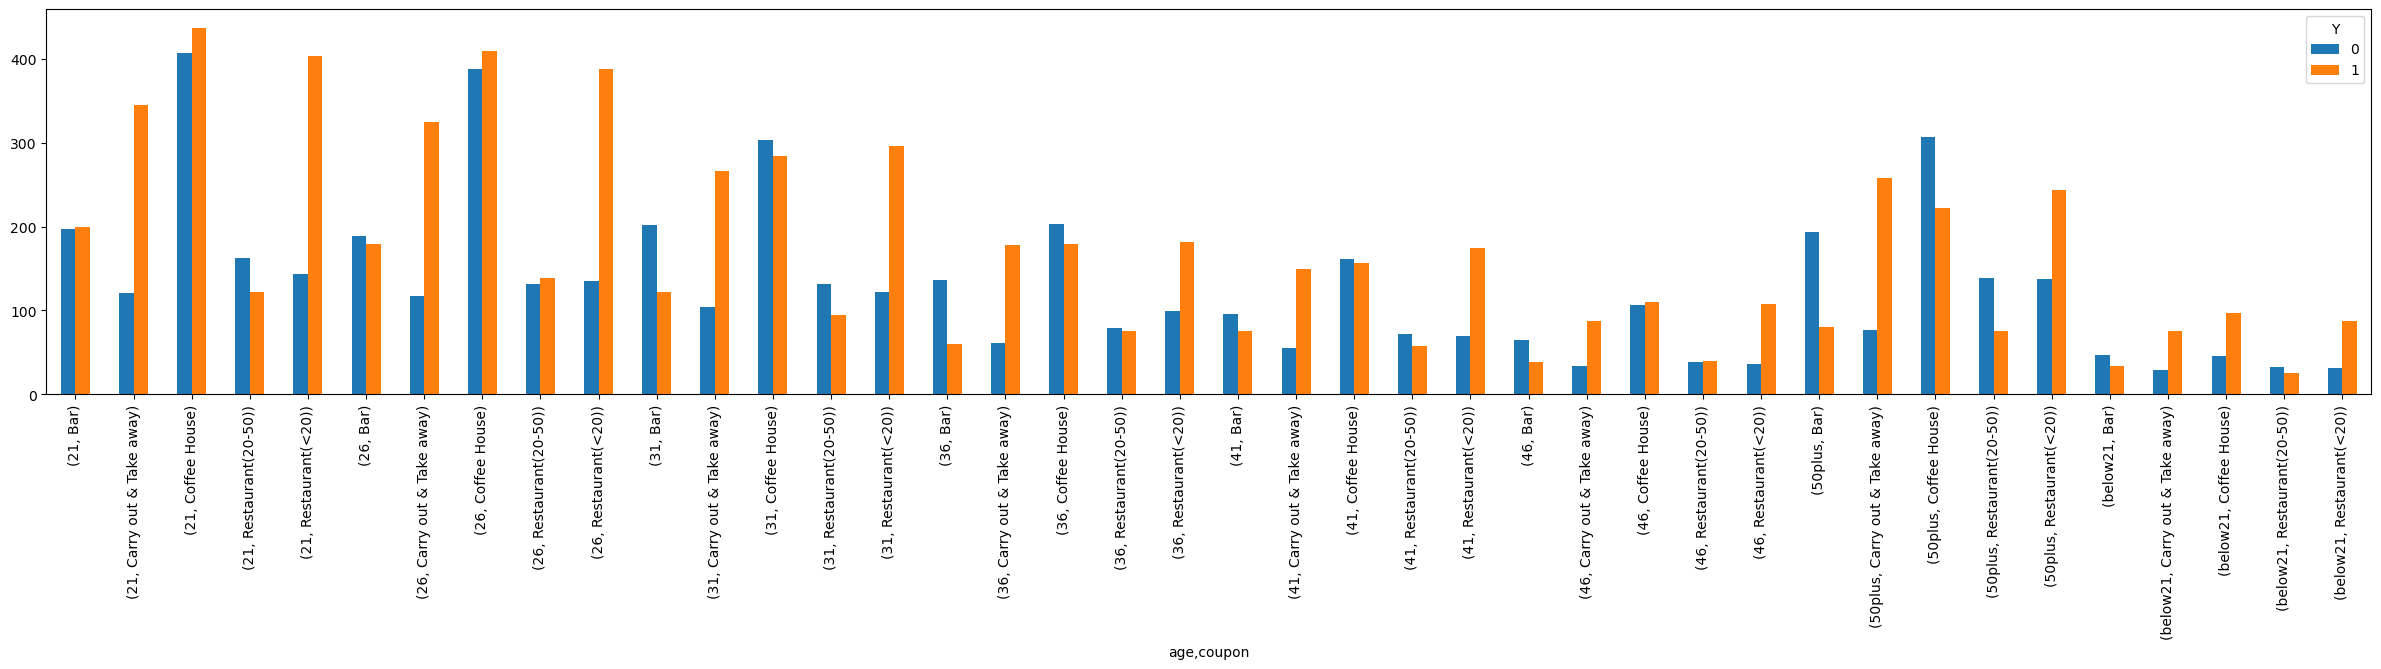

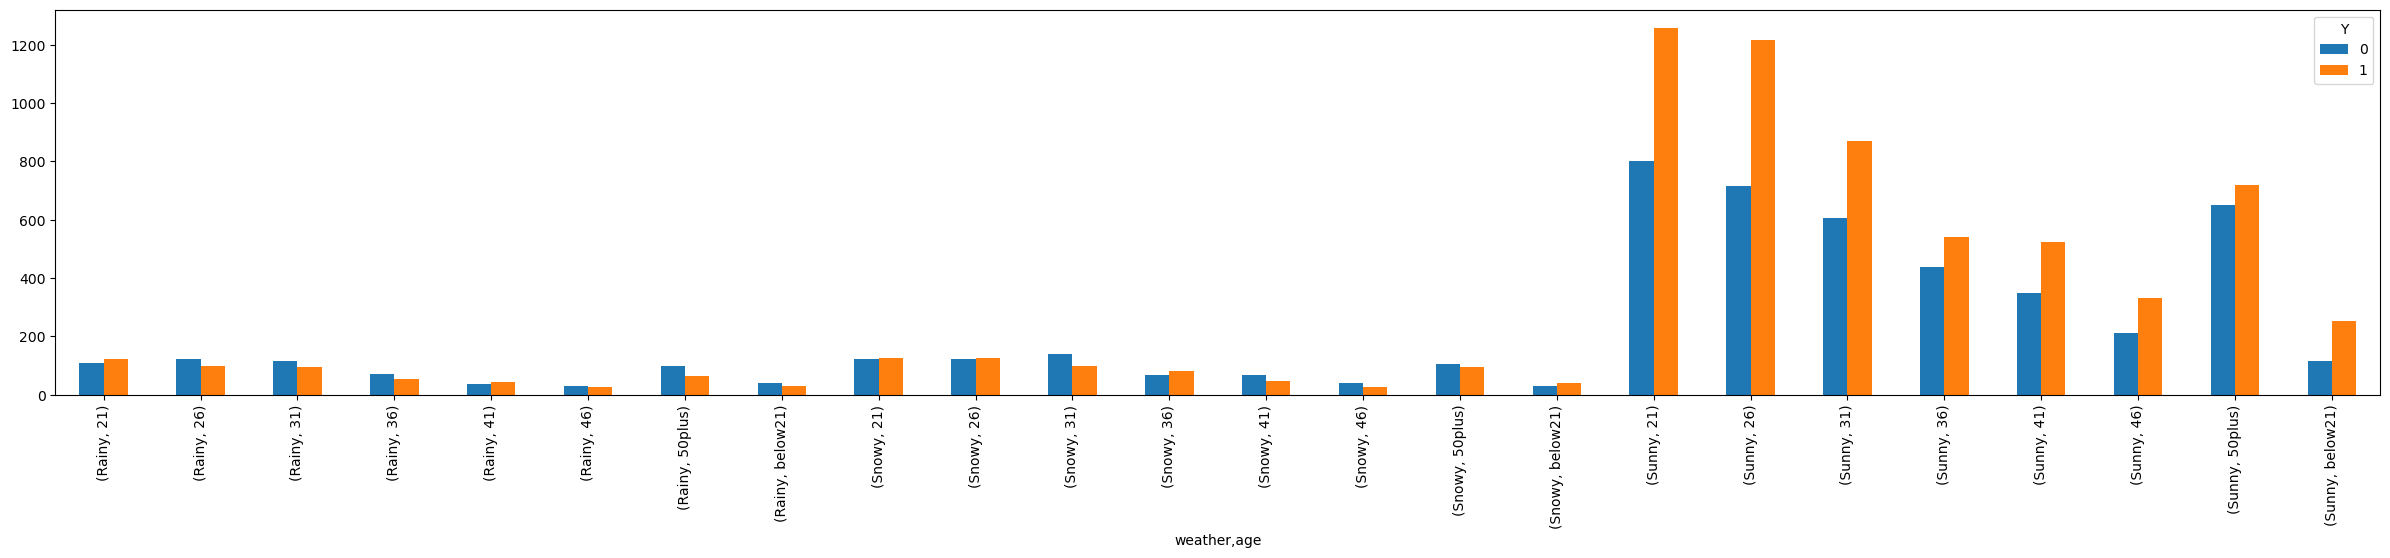

In [69]:
#Count plot to visualize the coupon acceptance rate across different categories

plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
sns.countplot(data=coupon, x=coupon['coupon'],hue=coupon['Y'])
plt.subplot(4,2,2)
sns.countplot(data=coupon, x=coupon['age'],hue=coupon['Y'])
plt.subplot(4,2,3)
sns.countplot(data=coupon, x=coupon['weather'],hue=coupon['Y'])
plt.subplot(4,2,4)
sns.countplot(data=coupon, x=coupon['passanger'],hue=coupon['Y'])
plt.subplot(4,2,5)
sns.countplot(data=coupon, x=coupon['maritalStatus'],hue=coupon['Y'])
plt.subplot(4,2,6)
sns.countplot(data=coupon, x=coupon['education'],hue=coupon['Y'])
plt.subplot(4,2,7)
sns.countplot(data=coupon, x=coupon['income'],hue=coupon['Y'])
plt.subplot(4,2,8)
sns.countplot(data=coupon, x=coupon['destination'],hue=coupon['Y'])

#bar plots to visualize the coupon acceptance rate across multiple categories to get more ideas

pd.crosstab([coupon['age'],coupon['coupon']],coupon['Y']).plot(kind='bar',figsize=(30,5))
pd.crosstab([coupon['weather'],coupon['age']],coupon['Y']).plot(kind='bar',figsize=(30,5))

*Based on the pie charts above:
1. Coupons delivered to drivers on Sunny Weather days - 79.5%
2. Coupons delivered to drivers are travelling alone or with friends - 83.8%

*Let's dive in deeper based on above conditions

<Axes: title={'center': 'Accepted Coupon Types among different age groups'}, xlabel='coupon', ylabel='counts'>

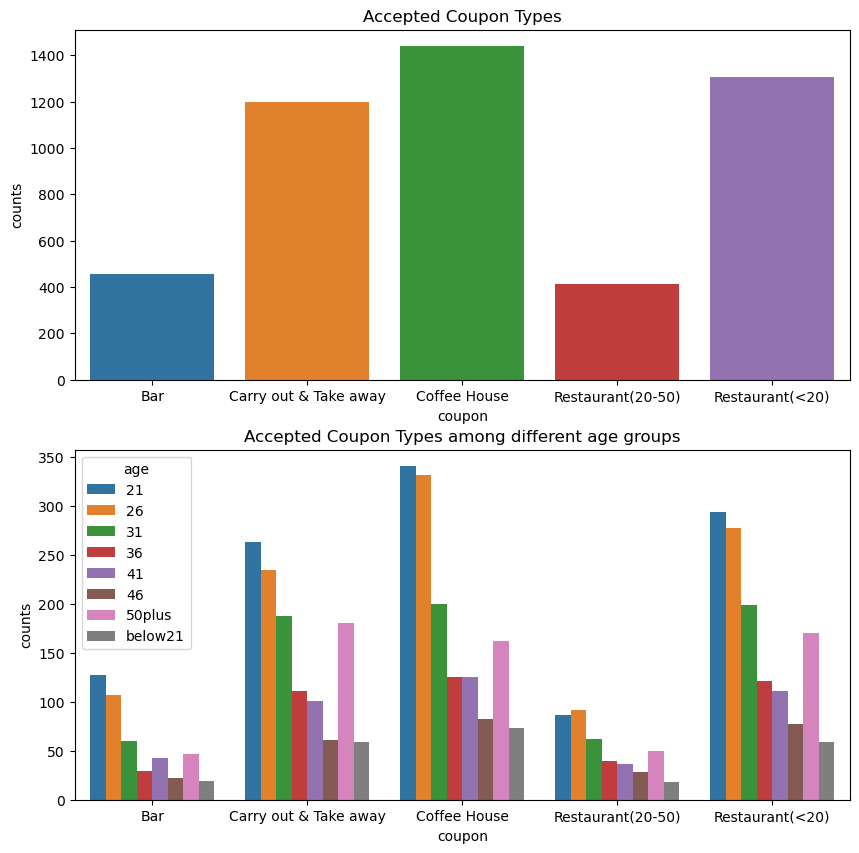

In [68]:
# Filter data of drivers who acepted coupons and travelling "Alone" or with Friends on Sunny weather day
coupon_df = coupon.query('Y == 1 and weather == "Sunny" and (passanger == "Alone" or passanger == "Friend(s)")')

#Group the filtered data based on accepted coupon types
cgrp_coupon = coupon_df.groupby(['coupon']).size().reset_index(name='counts').set_index('coupon')

#Add age feature to the data grouping to gain more insight on who accepted coupons
cgrp_coupon_age = coupon_df.groupby(['coupon','age']).size().reset_index(name='counts').set_index('coupon')

#Visualize the above data groups and write a story
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Accepted Coupon Types')
sns.barplot(x=cgrp_coupon.index, y=cgrp_coupon['counts'])
plt.subplot(2,1,2)
plt.title('Accepted Coupon Types among different age groups')
sns.barplot(x=cgrp_coupon_age.index, y=cgrp_coupon_age['counts'],hue=cgrp_coupon_age['age'])

- Seems specific age group of 21 have accepted more coffe house coupons, while travelling alone or with friends on Sunny day.
- Let's explore this age group's habits over a week, on how many times they go to CoffeHouse or restaurant etc..

In [ ]:
# Pick the frequency columns and plot the data for various age groups

habit_columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
plt.figure(figsize=(20,25))
j=0
for col in habit_columns:
    j+=1
    coupon_age_grp_df = coupon_df.groupby(['age',col]).size().reset_index(name='counts').set_index('age')
    plt.subplot(5,1,j)
    sns.barplot(x=coupon_age_grp_df.index, y=coupon_age_grp_df['counts'],hue=coupon_age_grp_df[col])

### Step 5: Conclusion

*Found some intersting information from the analysis to answer the question "Will the Customer Accept the Coupon?"

1. Drivers who are alone OR driving with friends have accepted most coupons.
2. Majority of the coupons are sent to drivers on Sunny day.
3. Carry out, Coffe House & Cheaper restaurant coupons stood out with more acceptance.
4. Age groups (21,26,31) have accpeted most Carry out, Coffe House & Cheaper restaurant coupons
5. Also, Age groups (21,26,31) showed habits of visiting Carry out, Coffe House & Cheaper restaurant 1~3 times per week

********From my Analysis, Younger age groups travelling alone or with friends have higher Carry out, Coffe House & Cheaper restaurant coupon acceptance rate

Note: There can be other dimensions that can be added to the analysis, like..
a. time at which most coupons are accepted.
b. Travel time to reach buisness location.
c. Income
d. Destination etc..

Adding these would lead to different conclusions and may provide other insights too..

Happy Exploration & Analysis!!!
